In [1]:
import yfinance as yf

In [2]:
ticker_symbol= "AAPL"

In [3]:
tickerData= yf.Ticker(ticker_symbol)

In [4]:
tickerDf=tickerData.history(period='1D', start='2019-8-1', end='2020-8-10')

In [5]:
tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-08-01,211.00,215.07,203.93,205.60,54017900,0.00,0
2019-08-02,202.74,203.63,198.89,201.25,40862100,0.00,0
2019-08-05,195.30,195.95,189.97,190.72,52393000,0.00,0
2019-08-06,193.65,195.38,191.41,194.33,35824800,0.00,0
2019-08-07,192.76,196.85,191.19,196.34,33364400,0.00,0
...,...,...,...,...,...,...,...
2020-08-03,432.02,445.75,430.79,434.97,77037800,0.00,0
2020-08-04,435.74,442.36,432.77,437.87,43267900,0.00,0
2020-08-05,436.72,440.78,434.81,439.46,30498000,0.00,0


In [6]:
import math
#import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
df = yf.Ticker('AAPL').history(period='1D', start='2012-01-01', end='2019-12-18')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-03,50.54,50.92,50.49,50.77,75555200,0.0,0.0
2012-01-04,50.61,51.19,50.52,51.04,65005500,0.0,0.0
2012-01-05,51.22,51.67,50.94,51.61,67817400,0.0,0.0
2012-01-06,51.82,52.19,51.75,52.14,79573200,0.0,0.0
2012-01-09,52.53,52.81,52.02,52.06,98506100,0.0,0.0
...,...,...,...,...,...,...,...
2019-12-11,266.97,269.24,266.66,268.91,19689200,0.0,0.0
2019-12-12,265.95,270.69,265.49,269.60,34327600,0.0,0.0
2019-12-13,269.60,273.41,269.07,273.26,33396900,0.0,0.0


In [10]:
df.shape

(2003, 7)

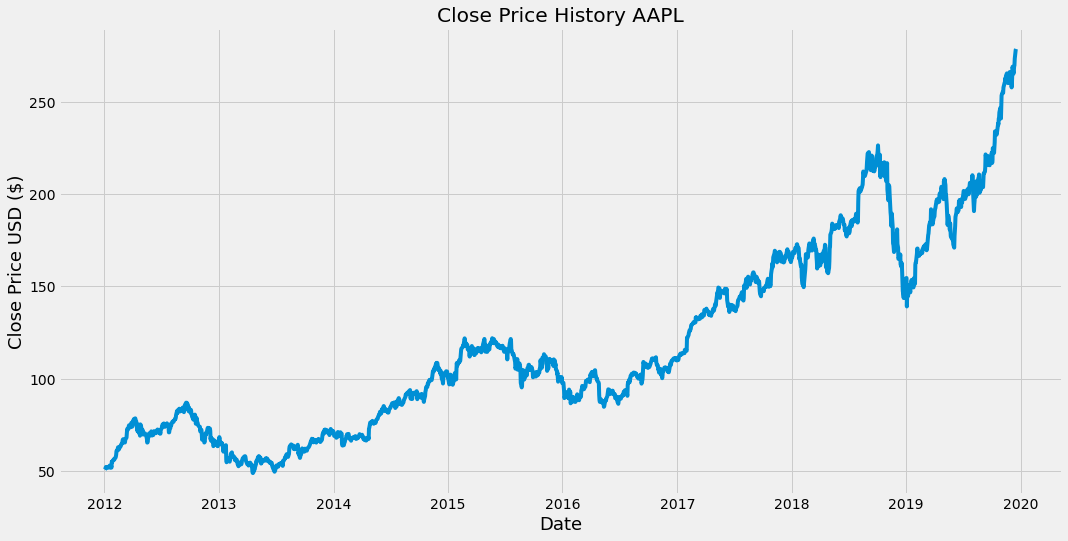

In [12]:
plt.figure(figsize=(16,8))
plt.title('Close Price History AAPL')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [15]:
data = df.filter(['Close'])

dataset = data.values

training_data_len = math.ceil( len(dataset) * 0.80 )

print(training_data_len)

1603


In [17]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00805854],
       [0.00923466],
       [0.01171756],
       ...,
       [0.97721828],
       [0.99760422],
       [1.        ]])

In [18]:
#
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [21]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [22]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1543, 60, 1)

In [24]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [26]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [27]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1543/1543 [==============================] - 23s 15ms/step - loss: 6.5497e-04


In [28]:
#Create testing data set
#Create new array containing scaled calues from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [29]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [30]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [33]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [34]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

2.1926407394409186

<ipython-input-35-26017c84d26d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


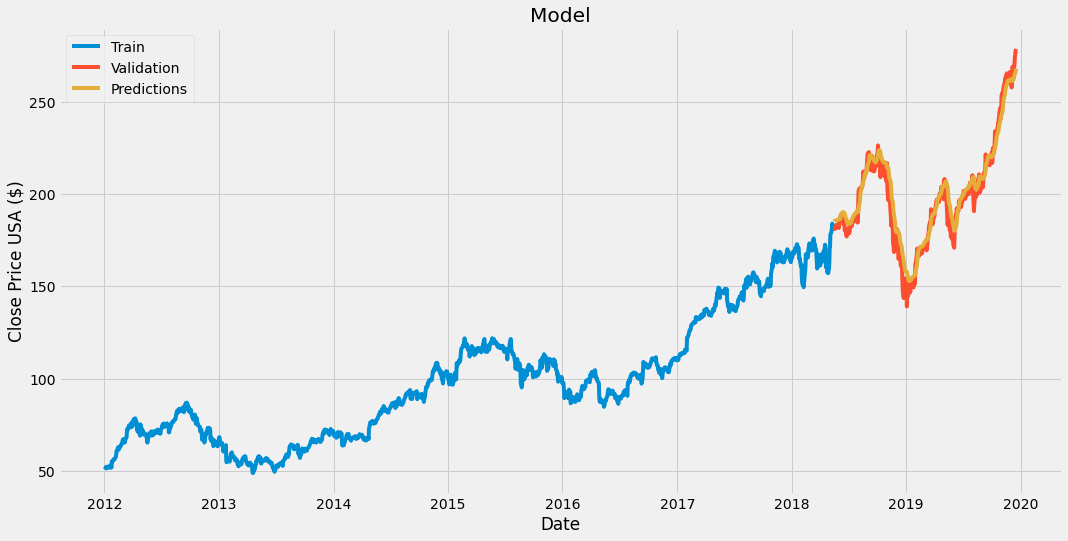

In [35]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USA ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc='best')
plt.show()

In [36]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,181.69,185.094696
2018-05-18,181.03,185.448853
2018-05-21,182.31,185.535904
2018-05-22,181.85,185.624237
2018-05-23,183.02,185.648209
...,...,...
2019-12-11,268.91,263.156433
2019-12-12,269.60,264.002625
2019-12-13,273.26,264.906799


In [37]:
#Get the quote
apple_quote = yf.Ticker('AAPL').history(period='1D', start='2012-01-01', end='2019-12-18')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get the last 60 day closing price values and convery the dataframe to an array
last_60_days = new_df[-60:].values
#Scale
last_60_days_scaled = scaler.transform(last_60_days)
#Create empty list
X_test = []
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test to numpy array
X_test = np.array(X_test)
#Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[269.71976]]


In [39]:
#Get the quote
apple_quote2 = yf.Ticker('AAPL').history(period='1D', start='2019-12-18', end='2019-12-19')
print(apple_quote2['Close'])

Date
2019-12-18    277.82
Name: Close, dtype: float64
